In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [51]:
# Load the data
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [53]:
#print the row which has missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [54]:
#create a new column called region with 0 for algerian data till 123 set and 1 for Sidi-Bel Abbes Region Dataset from 126 using loc

df.loc[:122, 'region'] = 0
df.loc[125:, 'region'] = 1

In [55]:
#drop the 122 row
df=df.drop(index=range(122, 125)).reset_index(drop=True)

#

In [56]:
df.iloc[124]

day                      3
month                    6
year                  2012
Temperature             29
 RH                     80
 Ws                     14
Rain                     2
FFMC                  48.7
DMC                    2.2
DC                     7.6
ISI                    0.3
BUI                    2.6
FWI                    0.1
Classes        not fire   
region                 1.0
Name: 124, dtype: object

In [57]:
df.dropna(inplace=True)

In [58]:
#drop na with reseting the index
df = df.dropna().reset_index(drop=True)


In [59]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [60]:
#remove the space in the column names using the strip method
df.columns = df.columns.str.strip()

In [61]:
#convert the columns to the correct data types in one go
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'region']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','region']].astype(int)


In [62]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [64]:
#change the columns from rain to fwi to float
df[['Rain','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)


In [65]:
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv', index=False)

EDA


In [66]:
df_copy = df.drop(columns=['day', 'month', 'year'])

In [67]:
# Replace the 'Classes' column with 0 where it contains 'not fire'
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)



In [68]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


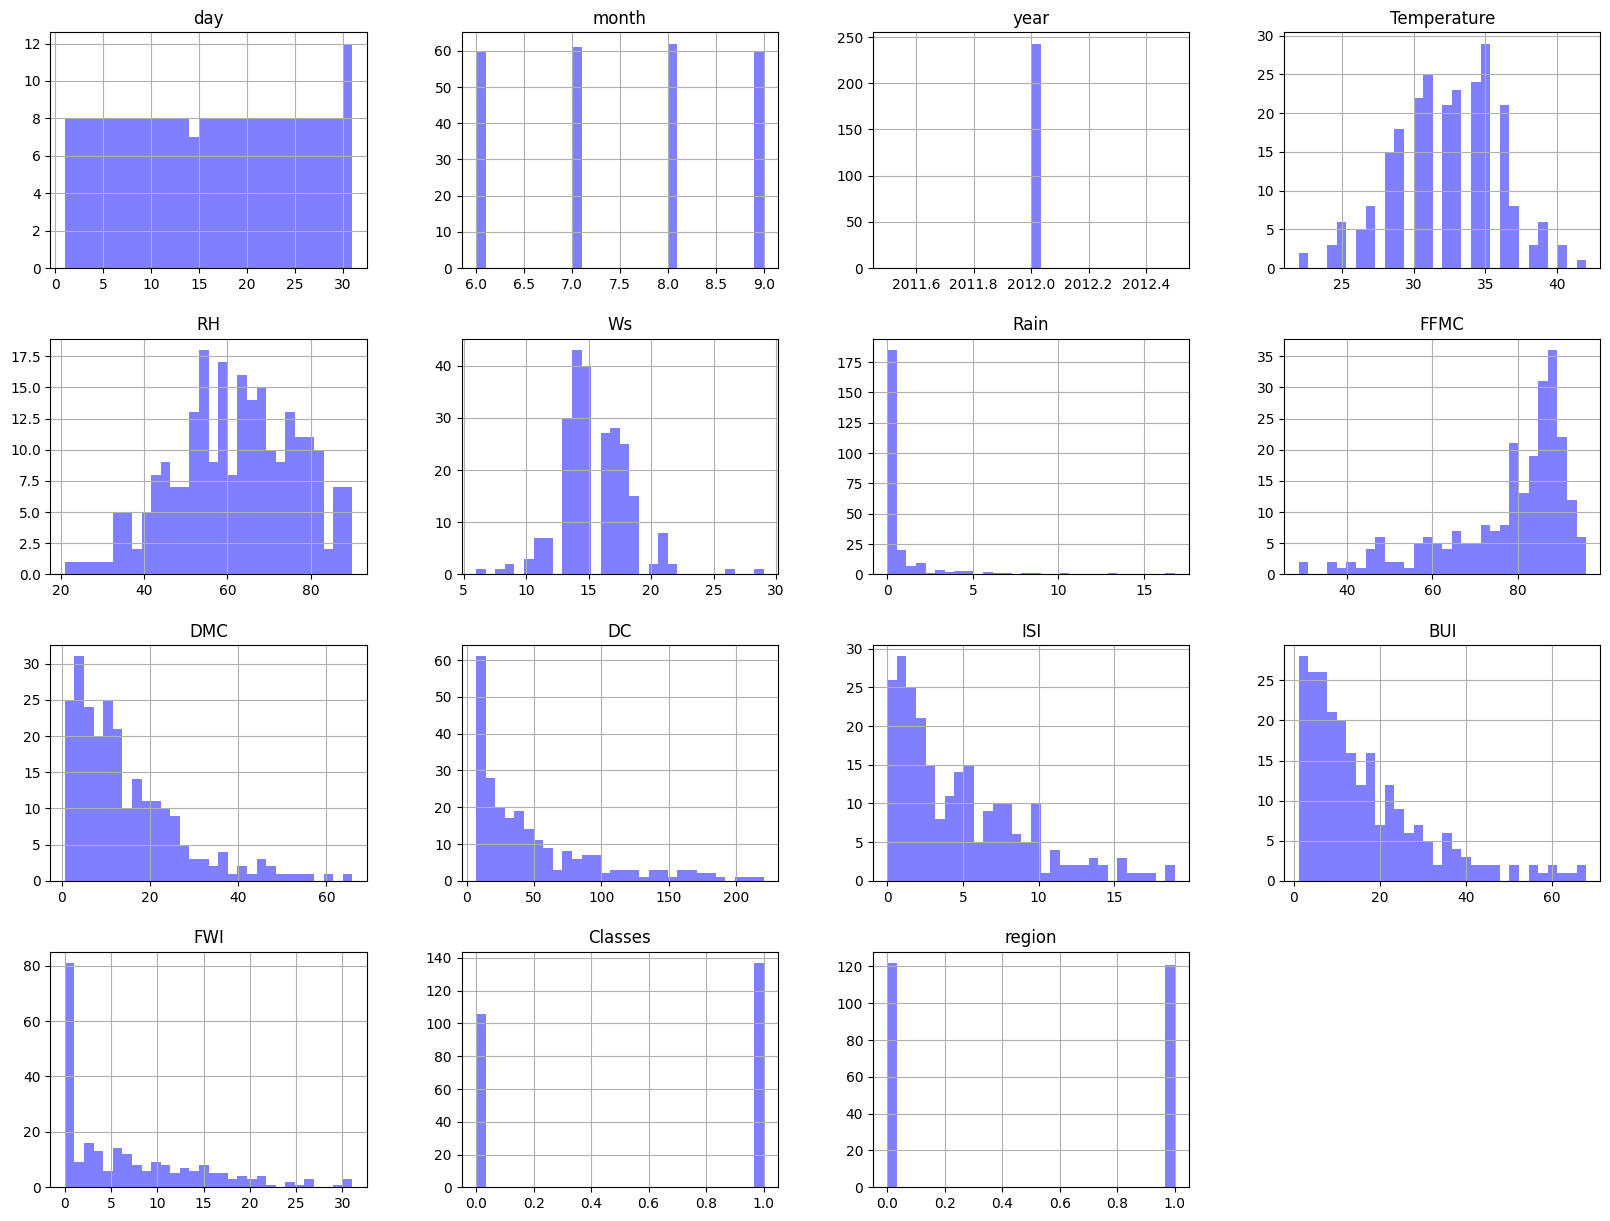

In [69]:
#plot a histogram density plot for the all column
plt.style.available
#apple xand y lables

df.hist(figsize=(20, 15), bins=30, color='blue', alpha=0.5)
plt.show()

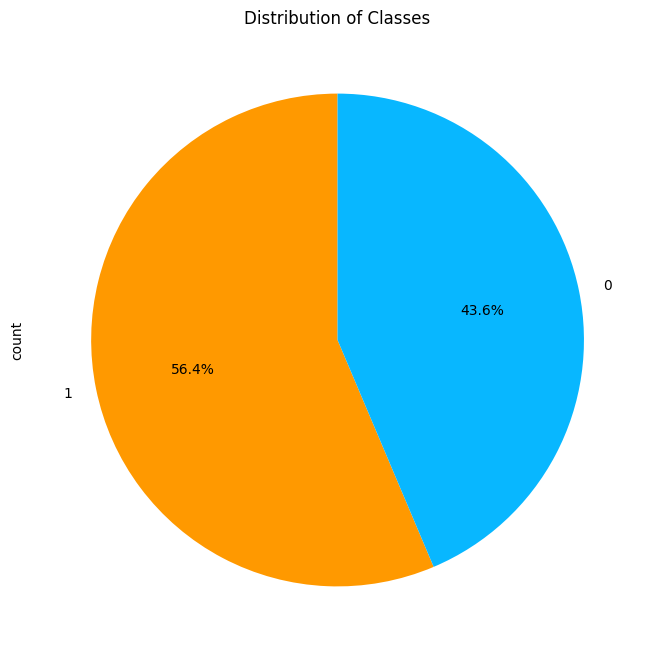

In [70]:
#prepare a pie plot the classes
# Create a pie plot for the 'Classes' column
plt.figure(figsize=(8, 8))
df['Classes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9900','#08b7ff'])
plt.title('Distribution of Classes')
plt.show()

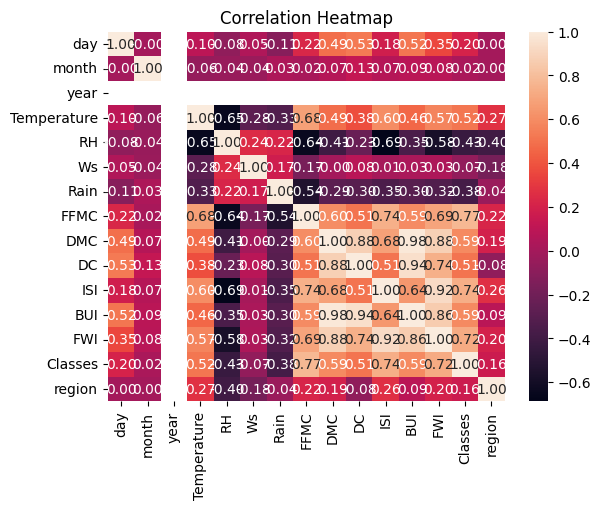

In [71]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

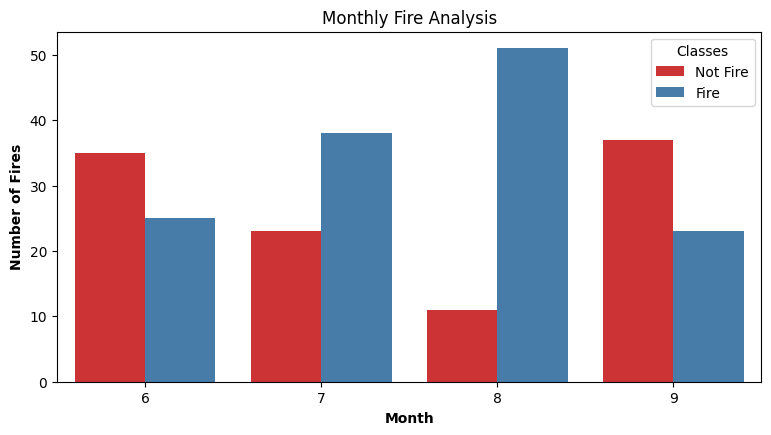

In [72]:
#create a monthly fire analysis using subplot with fire and not fire

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='month', data=df, hue='Classes', palette='Set1')
plt.title('Monthly Fire Analysis')
plt.xlabel('Month', weight='bold')
plt.ylabel('Number of Fires', weight='bold')
plt.legend(title='Classes', labels=['Not Fire', 'Fire'])






/var/folders/j4/87r164g571g19hxdqwwwrgr00000gn/T/ipykernel_60145/3869893391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='Temperature', data=df, palette='Set1')


Text(0, 0.5, 'Temperature')

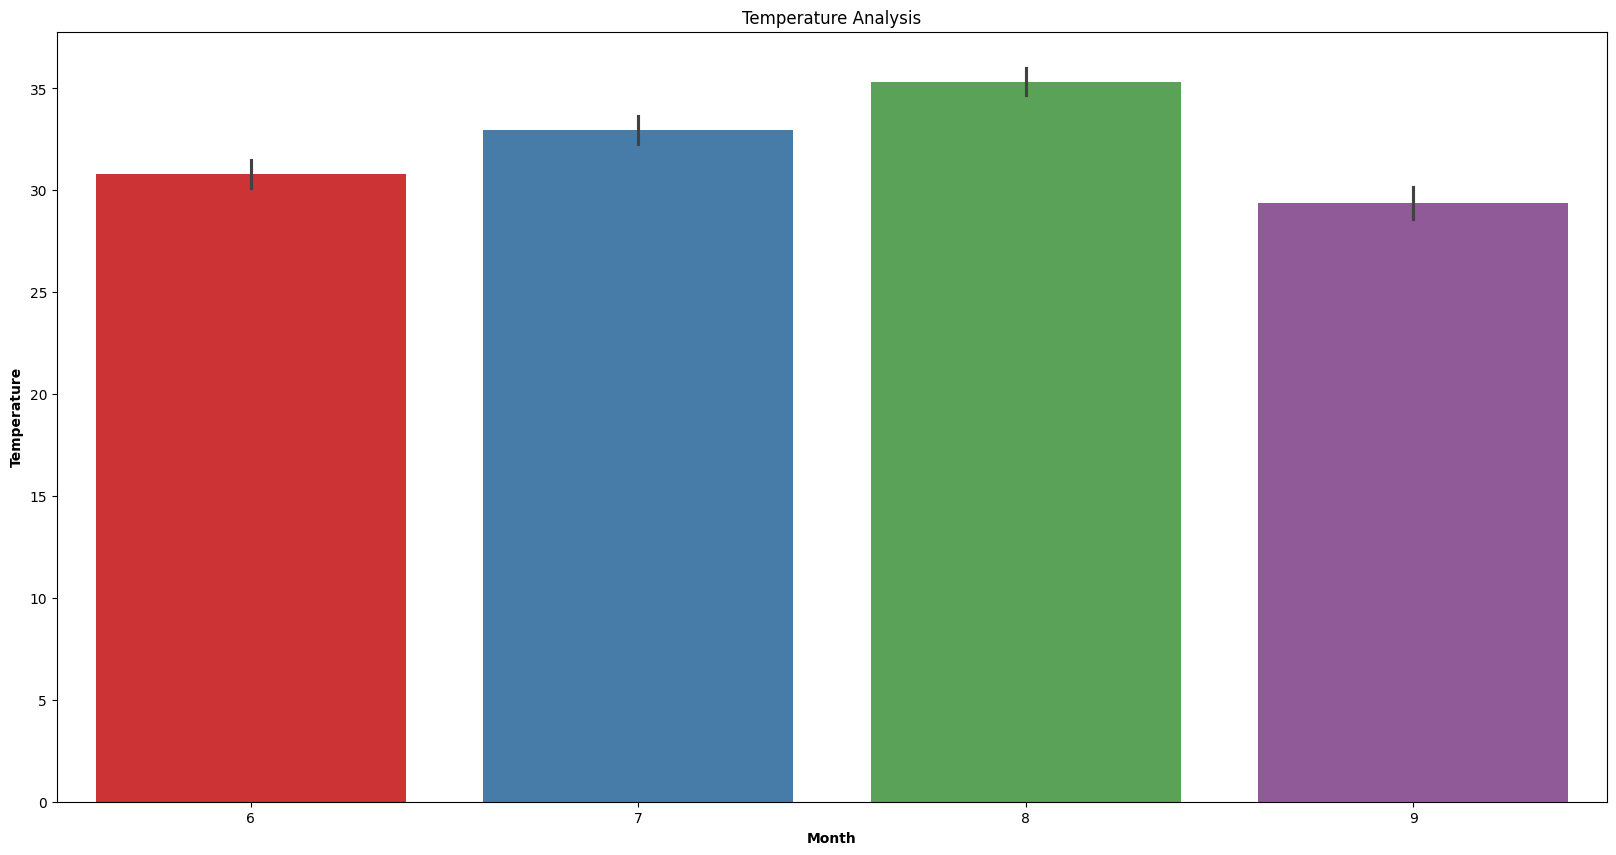

In [73]:
#create a temperature analysis showing the rise and fall of temperature
plt.figure(figsize=(20, 10))
plt.subplot()
sns.barplot(x='month', y='Temperature', data=df, palette='Set1')
plt.title('Temperature Analysis')
plt.xlabel('Month', weight='bold')
plt.ylabel('Temperature', weight='bold')